#2019 Dataset

Mounting Google Drive, where the dataset is stored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


data = pd.read_csv (r'/content/drive/MyDrive/district_level_mapping_2019.csv')

#1. Overview of the dataset

In [3]:
data.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
0,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,1,वेतन,N,V,2019-2020,6466568,6089232.0,0,6089232.0,94.16
1,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,3,मंहगाई भत्ता,N,V,2019-2020,1100048,853241.0,0,853241.0,77.56
2,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,4,यात्रा व्यय,N,V,2019-2020,10000,10000.0,0,10000.0,100.00
3,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,5,स्थानान्तरण यात्रा व्यय,N,V,2019-2020,57800,54450.0,0,54450.0,94.20
4,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,6,अन्य भत्ते,N,V,2019-2020,14340,14120.0,0,14120.0,98.47


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330266 entries, 0 to 330265
Data columns (total 20 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Division Code                                        328988 non-null  float64
 1   Division Description                                 328988 non-null  object 
 2   Treasury Code                                        328988 non-null  float64
 3   Treasury                                             330266 non-null  object 
 4   Grant Number                                         330266 non-null  int64  
 5   Grant Head Description                               330266 non-null  object 
 6   Major Head Code                                      330266 non-null  int64  
 7   Major Head Description                               329672 non-null  object 
 8   Scheme Code                                          3

In [5]:
data.isnull().sum()

Division Code                                          1278
Division Description                                   1278
Treasury Code                                          1278
Treasury                                                  0
Grant Number                                              0
Grant Head Description                                    0
Major Head Code                                           0
Major Head Description                                  594
Scheme Code                                               0
Scheme Code Description                                   0
Standard Object Code                                      0
Standard Object Description                               0
Plan / Non-Plan                                           0
Voted / Charged                                           0
fiscal_year                                               0
Progressive Allotment                                     0
Actual Progressive Expenditure upto mont

Assuming the fact that school education does not include  University and Higher Education, Adult education and Language Development.




#2. Filtering Data with respect to School Eucation

Identifying the different Grant Heads

In [6]:
data['Grant Head Description'].unique()

array(['आबकारी विभाग', 'आवास विभाग',
       'उद्योग विभाग (लघु उद्योग एवं निर्यात प्रोत्साहन)',
       'उद्योग विभाग (खानें और खनिज)',
       'उद्योग विभाग (खादी एवं ग्रामोद्योग)',
       'उद्योग विभाग (हथकरघा उद्योग)',
       'उद्योग विभाग (भारी एवं मध्यम उद्योग)',
       'उद्योग विभाग (मुद्रण तथा लेखन सामग्री )', 'ऊर्जा विभाग',
       'कृषि तथा अन्य सम्बद्ध विभाग (औद्यानिक एवं रेशम विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (कृषि)',
       'कृषि तथा अन्य सम्बद्ध विभाग (भूमि विकास एवं जल संसाधन)',
       'कृषि तथा अन्य सम्बद्ध विभाग (ग्राम्य विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (पंचायती राज)',
       'कृषि तथा अन्य सम्बद्ध विभाग ((पशुधन)',
       'कृषि तथा अन्य सम्बद्ध विभाग (दुग्धशाला विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (मत्स्य)',
       'कृषि तथा अन्य सम्बद्ध विभाग (सहकारिता)',
       'कार्मिक विभाग (प्रशिक्षण तथा अन्य व्यय)',
       'कार्मिक विभाग (लोक सेवा आयोग )', 'खाद्य तथा रसद विभाग',
       'खेल विभाग', 'गन्ना विकास विभाग (गन्ना)',
       'गन्ना विकास विभाग 

We will be dealing with only two Grant Heads with respect to school education that is Elementary Education and Secondary Education


*   शिक्षा विभाग (प्राथमिक शिक्षा)
*   शिक्षा विभाग (माध्यमिक शिक्षा)



In [7]:
FilteredData = data[(data['Grant Head Description'] == 'शिक्षा विभाग (माध्यमिक शिक्षा)')| (data['Grant Head Description'] == 'शिक्षा विभाग (प्राथमिक शिक्षा)')]

In [8]:
FilteredData.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
248833,800.0,AGRA,8.0,AGRA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2019-2020,19500000,18227734.0,0,18227734.0,93.48
248834,800.0,AGRA,6.0,ALIGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2019-2020,72800000,72800000.0,0,72800000.0,100.00
248835,2200.0,ALLAHABAD,64.0,ALLAHABAD II,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2019-2020,88560500,88377112.0,0,88377112.0,99.79
248836,4900.0,FAIZABAD,74.0,AMBEDKARNAGAR,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2019-2020,107100000,107099186.0,0,107099186.0,100.00
248837,2000.0,KANPUR NAGAR,81.0,AURAIYA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2019-2020,68250000,62365493.0,0,62365493.0,91.38


#3. Checking for Null Values in colmuns and duplicate rows

In [9]:
FilteredData.isnull().sum()

Division Code                                           0
Division Description                                    0
Treasury Code                                           0
Treasury                                                0
Grant Number                                            0
Grant Head Description                                  0
Major Head Code                                         0
Major Head Description                                 91
Scheme Code                                             0
Scheme Code Description                                 0
Standard Object Code                                    0
Standard Object Description                             0
Plan / Non-Plan                                         0
Voted / Charged                                         0
fiscal_year                                             0
Progressive Allotment                                   0
Actual Progressive Expenditure upto month (October)     0
Provisional Cu

Since there are no Null Values in Columns like Grant Number and Major Head Code which is essential for analysis we go ahead

In [10]:
FilteredData['Major Head Code'].value_counts()

2202    11098
2204     1316
2205     1099
2071      358
4202       91
Name: Major Head Code, dtype: int64

In [11]:
FilteredData.duplicated().sum()

598

Since it is not possible to have duplicate rows with the same expenditure within the same financial year for the exact same purpose we remove such rows.

In [12]:
FilteredData.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# 4. Visualising the Dataset

In [13]:
FilteredData.columns

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Grant Head Description', 'Major Head Code',
       'Major Head Description', 'Scheme Code', 'Scheme Code Description',
       'Standard Object Code', 'Standard Object Description',
       'Plan / Non-Plan', 'Voted / Charged', 'fiscal_year',
       'Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E'],
      dtype='object')

In [14]:
FilteredData[['Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E']].describe()

,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
count,1.336400e+04,1.336400e+04,13364.0,1.336400e+04,1.336400e+04
mean,3.939513e+07,3.971654e+07,0.0,3.971654e+07,1.128367e+03
std,4.333756e+08,4.761431e+08,0.0,4.761431e+08,1.213201e+05
min,-3.000000e+05,-1.850700e+04,0.0,-1.850700e+04,-3.084500e+02
25%,4.000000e+03,1.500000e+03,0.0,1.500000e+03,1.117750e+01
50%,5.235900e+04,4.000000e+04,0.0,4.000000e+04,9.700500e+01
75%,1.100000e+06,9.605555e+05,0.0,9.605555e+05,1.000000e+02
max,2.955904e+10,2.955904e+10,0.0,2.955904e+10,1.402500e+07


Since the column *Provisional Current Month Expenditure(November)* does not have any values it can be removed from the dataset

In [15]:
FilteredData.drop('Provisional Current Month Expenditure(November)', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


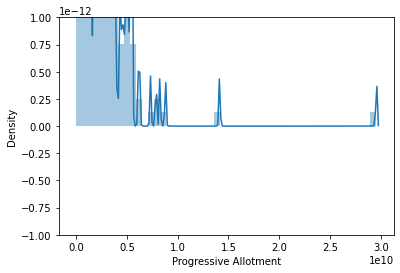

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


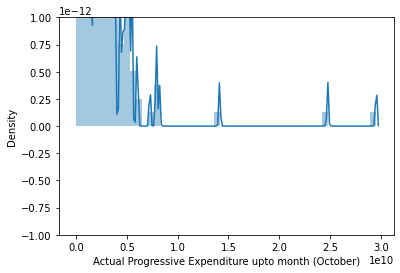

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


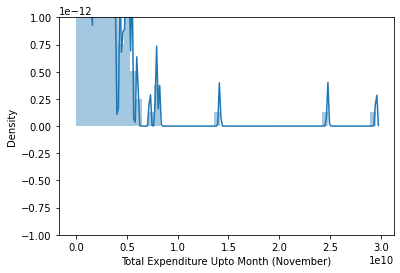

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


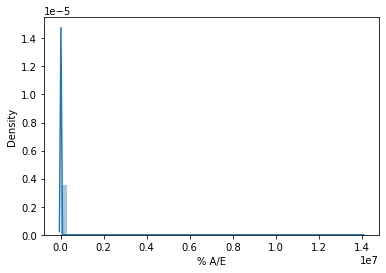

In [17]:
sb.distplot(FilteredData['Progressive Allotment'])
plt.show()
sb.distplot(FilteredData['Actual Progressive Expenditure upto month (October)'])
plt.show()
sb.distplot(FilteredData['Total Expenditure Upto Month (November)'])
plt.show()
sb.distplot(FilteredData['% A/E'])
plt.show()

We can see that the data is right skewed. 

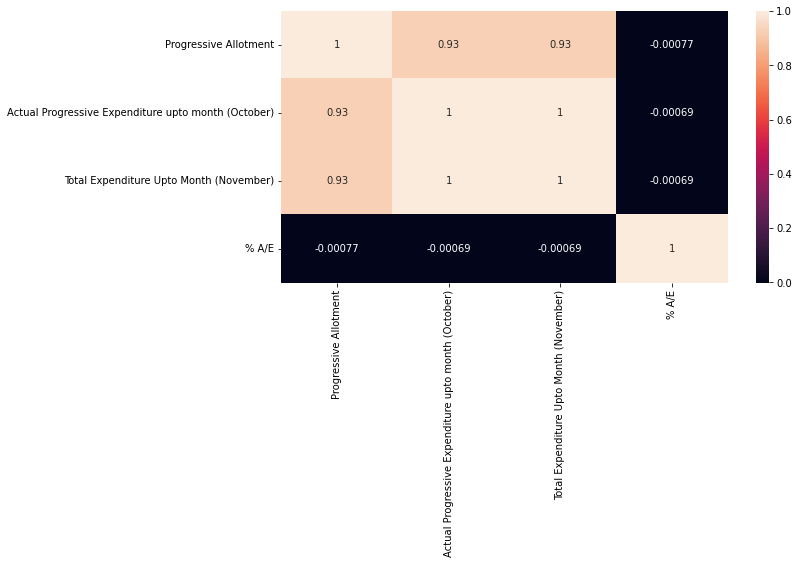

In [20]:
plt.figure (figsize=(10,5))
sb.heatmap(FilteredData[['Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Total Expenditure Upto Month (November)', '% A/E']].corr(), annot=True)
plt.show();

# Q1) Calculating the share of expenditure on school education

In [21]:
pd.DataFrame(FilteredData.groupby(['Grant Head Description','Grant Number'])['Total Expenditure Upto Month (November)'].sum())

,,Total Expenditure Upto Month (November)
Grant Head Description,Grant Number,
शिक्षा विभाग (प्राथमिक शिक्षा),71,4.270724e+11
शिक्षा विभाग (माध्यमिक शिक्षा),72,1.036994e+11


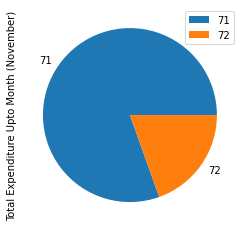

In [22]:
FilteredData.groupby(['Grant Number']).sum().plot(kind='pie', y='Total Expenditure Upto Month (November)')

# Q2) Estimating the share of capital expenditure

We know that **Major Head 4202** maps to *Capital Outlay on Education, Sports, Art and Culture*

In [23]:
Capital= FilteredData[FilteredData['Major Head Code']==4202]
pd.DataFrame(Capital['Total Expenditure Upto Month (November)'].groupby(Capital['Grant Head Description']).sum())

,Total Expenditure Upto Month (November)
Grant Head Description,
शिक्षा विभाग (प्राथमिक शिक्षा),3.259907e+09
शिक्षा विभाग (माध्यमिक शिक्षा),1.472834e+09


# Q3) Estimate the per-capita expenditure on school education in the state, and each district. 

With reference to the following [website](https://www.census2011.co.in/census/state/uttar+pradesh.html), we find the projected population for the 2021 in UP is *231,521,022*

In [24]:
percap_exp = FilteredData['Total Expenditure Upto Month (November)'].sum()/231521022
print(' The Per-capita expenditure on school education for the year 2020-21 is %.2f' %(percap_exp))

 The Per-capita expenditure on school education for the year 2020-21 is 2292.54


**Note** : Was unable to find district wise population data for the year 2019-20

#Q4) Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure

In [25]:
cap_exp = FilteredData[FilteredData['Major Head Code'] == 4202]
rev_exp = FilteredData[FilteredData['Major Head Code'] != 4202]

Captial Expenditure

In [26]:
op = pd.DataFrame((cap_exp['Total Expenditure Upto Month (November)'].groupby(cap_exp['Treasury']).sum())/cap_exp['Progressive Allotment'].groupby(cap_exp['Treasury']).sum()).sort_values(by=0, ascending=False)
op

,0
Treasury,
MORADABAD,2.504253
KANPUR DEHAT,1.030928
AGRA,1.000000
KHERI,1.000000
KUSHI NAGAR,1.000000
LALITPUR,1.000000
LUCKNOW COLL.,1.000000
MAHARAJGANJ,1.000000
MAINPURI,1.000000


In [27]:
op[0].value_counts()

1.000000    38
2.504253     1
1.030928     1
1.000000     1
0.999933     1
0.999860     1
0.999480     1
0.998576     1
0.967742     1
0.000000     1
Name: 0, dtype: int64

It was found that **38 Distrcits** utilized 100% of their allocated funds for capital expenditure



Revenue Expenditure

In [28]:
op = pd.DataFrame((rev_exp['Total Expenditure Upto Month (November)'].groupby(rev_exp['Treasury']).sum())/rev_exp['Progressive Allotment'].groupby(rev_exp['Treasury']).sum()).sort_values(by=0, ascending=False)
op

,0
Treasury,
LUCKNOW COLL.,1.363904
KHERI,0.995516
BULANDSHAHR,0.995333
AZAMGARH,0.991971
KANNAUJ,0.991474
...,...
FIROZABAD,0.911207
SULTANPUR,0.909945
GHAZIABAD,0.896680


We can infer that Lucknow Coll. district ranked first in the total revenue expenditure